<a href="https://colab.research.google.com/github/DLPY/Classification_Session_2/blob/main/Classification_Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Session 2 - Notebook

##**1.Import Pandas, Pyplot and Read data**

In [1]:
import matplotlib.pyplot as plt #Visualization Lib
import numpy as np #mathamatical functions
import pandas as pd #Data manipulation lib
import seaborn as sns #Visualization Lib
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# CSV is first read in from a github raw file another option is to import the notebook to your session storage by click on the file icon on left toolbar then importing csv
! wget https://raw.githubusercontent.com/DLPY/Classification_Session_2/main/Student2020.csv

--2022-02-22 18:46:01--  https://raw.githubusercontent.com/DLPY/Classification_Session_2/main/Student2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113427 (111K) [text/plain]
Saving to: ‘Student2020.csv.6’

Student2020.csv.6   100%[===================>] 110.77K  --.-KB/s    in 0.02s   

2022-02-22 18:46:01 (5.33 MB/s) - ‘Student2020.csv.6’ saved [113427/113427]



In [3]:
# Once we have the csv file pd.read_csv() converts it to a pandas dataframe
df = pd.read_csv('Student2020.csv')
df['Pass'] = df['Pass'].apply(lambda x : 0 if x == 'Fail' else 1 )

##**2. Exploratory Data Analysis (EDA)**

In [4]:
# Display the count of rows and columns.
df.shape

(1131, 13)

In [5]:
# Review a small sample of the data.
df.head()

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English,Pass
0,19,5.000000,6.698392,3.301608,9.308199,6.875000,7.321865,7.790997,8.721329,352,19,45,1
1,31,6.285538,2.500000,6.214462,7.535538,6.303307,7.095179,6.892769,6.440564,187,35,28,1
2,36,6.776966,2.500000,5.723034,8.026966,7.040449,7.258989,7.138483,6.194850,111,21,17,1
3,22,6.756132,3.987737,4.256132,6.621934,5.945164,5.089465,2.500000,4.042689,327,36,46,0
4,23,7.228655,2.228655,5.542690,6.453509,6.942836,6.285575,3.314034,4.528460,274,33,35,0


age                    0
Auditory               0
Kinaesthetic           0
Visual                 0
ExtrinsicMotivation    0
IntrinsicMotivation    0
SelfEfficacy           0
StudyTime              0
Conscientiousness      0
CAOpoints              0
Maths                  0
English                0
Pass                   0
dtype: int64


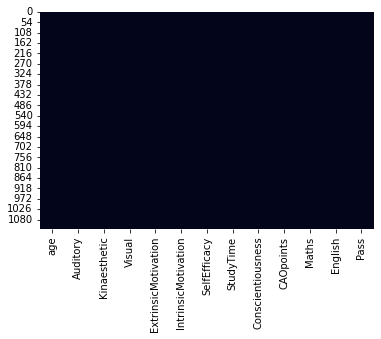

In [6]:
#Checking for null values
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False)

In [7]:
# Detailed overview of the dataframe itself.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1131 non-null   int64  
 1   Auditory             1131 non-null   float64
 2   Kinaesthetic         1131 non-null   float64
 3   Visual               1131 non-null   float64
 4   ExtrinsicMotivation  1131 non-null   float64
 5   IntrinsicMotivation  1131 non-null   float64
 6   SelfEfficacy         1131 non-null   float64
 7   StudyTime            1131 non-null   float64
 8   Conscientiousness    1131 non-null   float64
 9   CAOpoints            1131 non-null   int64  
 10  Maths                1131 non-null   int64  
 11  English              1131 non-null   int64  
 12  Pass                 1131 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 115.0 KB


In [8]:
# remove duplicates, if any
df = df[~df.duplicated()] 
df.shape
#No duplicate values

(1124, 13)

 ### i) Investigate correlation in the new dataframe.

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English,Pass
age,1.000000,0.016825,-0.063601,0.054816,0.171059,0.319739,0.172420,0.030663,0.305867,-0.691308,-0.458193,-0.619608,0.084879
Auditory,0.016825,1.000000,-0.543289,-0.351479,0.055003,0.021396,0.039490,-0.001030,0.015399,0.098766,0.087820,0.088407,-0.004460
Kinaesthetic,-0.063601,-0.543289,1.000000,-0.595024,-0.114987,-0.093360,-0.133687,0.053333,-0.069957,-0.002090,-0.028390,0.045155,-0.167694
Visual,0.054816,-0.351479,-0.595024,1.000000,0.075570,0.083625,0.111273,-0.058486,0.063269,-0.092219,-0.052413,-0.134986,0.191269
ExtrinsicMotivation,0.171059,0.055003,-0.114987,0.075570,1.000000,0.448323,0.394495,0.216675,0.391213,-0.167776,0.022150,-0.199346,0.129208
IntrinsicMotivation,0.319739,0.021396,-0.093360,0.083625,0.448323,1.000000,0.484760,0.307273,0.437472,-0.249305,-0.138660,-0.249421,0.189505
SelfEfficacy,0.172420,0.039490,-0.133687,0.111273,0.394495,0.484760,1.000000,0.327281,0.383013,-0.149774,-0.002650,-0.199836,0.076327
StudyTime,0.030663,-0.001030,0.053333,-0.058486,0.216675,0.307273,0.327281,1.000000,0.461622,0.011378,0.035673,-0.024674,0.033838
Conscientiousness,0.305867,0.015399,-0.069957,0.063269,0.391213,0.437472,0.383013,0.461622,1.000000,-0.234315,-0.158174,-0.241094,0.085627
CAOpoints,-0.691308,0.098766,-0.002090,-0.092219,-0.167776,-0.249305,-0.149774,0.011378,-0.234315,1.000000,0.723115,0.875378,0.073912


### ii) Variables correlated to Pass.

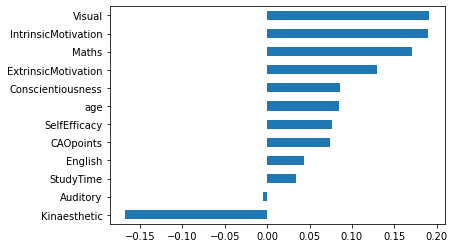

In [10]:
df.corr()['Pass'].sort_values().drop('Pass').plot(kind='barh')

### iii) Summary of Pass and Fail

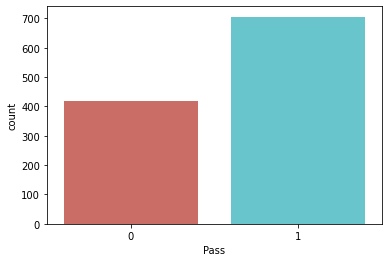

In [11]:
sns.countplot(x='Pass', data=df, palette='hls')

From the above graph, we observed there are many more Students are 'Pass'. This is referred to as 'class imbalance'.

## **3.Standardization of data using MinMax Scaler**

In [12]:
# Independent Variable
X = df.drop(['Pass'], axis=1)

# Depenedent Variable
y = df.Pass.values

In [13]:
X.head()

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English
0,19,5.000000,6.698392,3.301608,9.308199,6.875000,7.321865,7.790997,8.721329,352,19,45
1,31,6.285538,2.500000,6.214462,7.535538,6.303307,7.095179,6.892769,6.440564,187,35,28
2,36,6.776966,2.500000,5.723034,8.026966,7.040449,7.258989,7.138483,6.194850,111,21,17
3,22,6.756132,3.987737,4.256132,6.621934,5.945164,5.089465,2.500000,4.042689,327,36,46
4,23,7.228655,2.228655,5.542690,6.453509,6.942836,6.285575,3.314034,4.528460,274,33,35


In [14]:
trans = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaled_X = pd.DataFrame(trans.fit_transform(X))
column_names = ['age', 'Auditory', 'Kinaesthetic', 'Visual', 'ExtrinsicMotivation', 'IntrinsicMotivation', 'SelfEfficacy', 'StudyTime', 'Conscientiousness', 'CAOpoints', 'Maths', 'English']
scaled_X.columns = column_names

In [15]:
scaled_X.head()

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English
0,-0.951220,0.062872,0.356470,-0.384994,0.796966,0.169471,0.327615,0.507512,0.662943,0.1264,-0.62,-0.10
1,-0.365854,0.336144,-0.493733,0.217283,0.276713,0.016268,0.270702,0.307256,0.040436,-0.4016,-0.30,-0.44
2,-0.121951,0.440609,-0.493733,0.115672,0.420941,0.213808,0.311829,0.362037,-0.026629,-0.6448,-0.58,-0.66
3,-0.804878,0.436180,-0.192456,-0.187632,0.008583,-0.079707,-0.232862,-0.672094,-0.614036,0.0464,-0.28,-0.08
4,-0.756098,0.536627,-0.548682,0.078383,-0.040848,0.187649,0.067439,-0.490608,-0.481451,-0.1232,-0.34,-0.30


## **4.Classification Using KNN**

### i) KNN Model without scaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
neigh = KNeighborsClassifier(n_neighbors=5)
knn = neigh.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [18]:
target_names = ['Pass', 'Fail']
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))
print('\nClassification report\n')
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix

[[ 70  62]
 [ 57 182]]

Classification report

              precision    recall  f1-score   support

        Pass       0.55      0.53      0.54       132
        Fail       0.75      0.76      0.75       239

    accuracy                           0.68       371
   macro avg       0.65      0.65      0.65       371
weighted avg       0.68      0.68      0.68       371



### ii) KNN Model with scaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=5)
knn = neigh.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))
print('\nClassification report\n')
print(classification_report(y_test, y_pred, target_names=target_names))


Confusion Matrix

[[ 84  48]
 [ 31 208]]

Classification report

              precision    recall  f1-score   support

        Pass       0.73      0.64      0.68       132
        Fail       0.81      0.87      0.84       239

    accuracy                           0.79       371
   macro avg       0.77      0.75      0.76       371
weighted avg       0.78      0.79      0.78       371



### iii) Parameter Search using For Loop

In [20]:
for x in [5,10,15,25,30,35]:
  neigh = KNeighborsClassifier(n_neighbors=x)
  knn = neigh.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(f"The value of K = {x}")
  print('\nClassification report\n')
  print(classification_report(y_test, y_pred, target_names=target_names))
  classification_report_knn = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T
  knn_without_scaler = classification_report_knn['f1-score']['accuracy']

The value of K = 5

Classification report

              precision    recall  f1-score   support

        Pass       0.73      0.64      0.68       132
        Fail       0.81      0.87      0.84       239

    accuracy                           0.79       371
   macro avg       0.77      0.75      0.76       371
weighted avg       0.78      0.79      0.78       371

The value of K = 10

Classification report

              precision    recall  f1-score   support

        Pass       0.71      0.65      0.68       132
        Fail       0.82      0.85      0.83       239

    accuracy                           0.78       371
   macro avg       0.76      0.75      0.76       371
weighted avg       0.78      0.78      0.78       371

The value of K = 15

Classification report

              precision    recall  f1-score   support

        Pass       0.71      0.56      0.63       132
        Fail       0.78      0.87      0.83       239

    accuracy                           0.76       3

### iv) Parameter Selection using GridSearchCV

In [21]:
grid_params = {
    'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,22,24,26,28,30,32,34],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan']
}

gs = GridSearchCV(
  KNeighborsClassifier(),
  grid_params, 
  cv = 3, # cross validation to try for each set of parameters
  n_jobs = -1, # number of processors -1 will use all avaliable
  verbose = 1 # detailed print out
)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [22]:
print('Best Parameters\n')
print(gs_results.best_estimator_)

grid_predictions = gs.predict(X_test)

print('Confusion Matrix\n')
print(confusion_matrix(y_test, grid_predictions))
print('\nClassification report\n')
print(classification_report(y_test, grid_predictions, target_names=target_names))
classification_report_knn = pd.DataFrame(classification_report(y_test,grid_predictions,output_dict=True)).T
knn_with_scaler = classification_report_knn['f1-score']['accuracy']

Best Parameters

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
Confusion Matrix

[[ 87  45]
 [ 25 214]]

Classification report

              precision    recall  f1-score   support

        Pass       0.78      0.66      0.71       132
        Fail       0.83      0.90      0.86       239

    accuracy                           0.81       371
   macro avg       0.80      0.78      0.79       371
weighted avg       0.81      0.81      0.81       371



## **5.Classification Using Logistic Regression**

### i) Logistic Regression Model without scaler

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# instantiate the model (using the default parameters)

logreg = LogisticRegression(solver='lbfgs', max_iter=300)

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [24]:
# Coefficient and Intercept
print(logreg.coef_)
print(logreg.intercept_)

[[ 0.05742924 -0.39607195 -0.47291936 -0.20442815  0.09650097  0.42139732
  -0.09475915 -0.05977398  0.02921992  0.00122537  0.01969372  0.0052412 ]]
[-0.0736338]


In [25]:
# Create dataframe from regressor coefficient to display results in a dataframe
column_names = ['age', 'Auditory', 'Kinaesthetic', 'Visual', 'ExtrinsicMotivation', 'IntrinsicMotivation', 'SelfEfficacy', 'StudyTime', 'Conscientiousness', 'CAOpoints', 'Maths', 'English']
coefficient_df = pd.DataFrame(logreg.coef_) # T - Transpose dataframe rows to columns
coefficient_df.columns = column_names
coefficient_df

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English
0,0.057429,-0.396072,-0.472919,-0.204428,0.096501,0.421397,-0.094759,-0.059774,0.02922,0.001225,0.019694,0.005241


In [26]:
# Predict test set from model built during training 
y_pred = logreg.predict(X_test)

#### i) Confusion Matrix

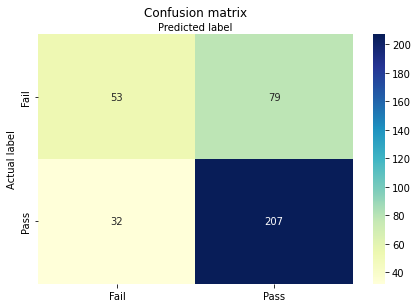

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Fail', 'Pass']); ax.yaxis.set_ticklabels(['Fail', 'Pass']);

#### ii) classification report - Accuracy, Precision, Recall, F1-Score

In [28]:
log_without_scaler = classification_report(y_test, y_pred, target_names=target_names)
classificationReport = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T
log_without_scaler = classificationReport['f1-score']['accuracy']
classificationReport

,precision,recall,f1-score,support
0,0.623529,0.401515,0.488479,132.000000
1,0.723776,0.866109,0.788571,239.000000
accuracy,0.700809,0.700809,0.700809,0.700809
macro avg,0.673653,0.633812,0.638525,371.000000
weighted avg,0.688109,0.700809,0.681800,371.000000


#### iii) ROC Curve

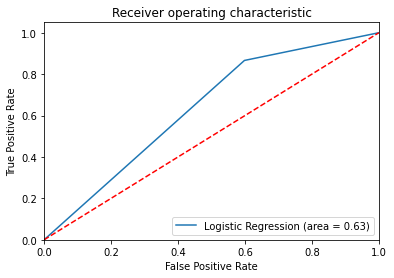

In [29]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### ii) Logistic Regression Model with scaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)

In [31]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=300)

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [32]:
# Coefficient and Intercept
print(logreg.coef_)
print(logreg.intercept_)

[[ 1.02440956 -0.16040372 -0.54623301  0.71380604  0.35198536  1.4146648
  -0.31416718 -0.25574539  0.13379691  0.34760502  0.93065754  0.24861386]]
[0.88810851]


In [33]:
# Create dataframe from regressor coefficient to display results in a dataframe
column_names = ['age', 'Auditory', 'Kinaesthetic', 'Visual', 'ExtrinsicMotivation', 'IntrinsicMotivation', 'SelfEfficacy', 'StudyTime', 'Conscientiousness', 'CAOpoints', 'Maths', 'English']
coefficient_df = pd.DataFrame(logreg.coef_) # T - Transpose dataframe rows to columns
coefficient_df.columns = column_names
coefficient_df

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English
0,1.02441,-0.160404,-0.546233,0.713806,0.351985,1.414665,-0.314167,-0.255745,0.133797,0.347605,0.930658,0.248614


In [34]:
# Predict test set from model built during training 
y_pred = logreg.predict(X_test)

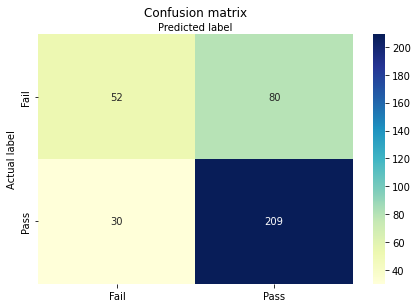

In [35]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Fail', 'Pass']); ax.yaxis.set_ticklabels(['Fail', 'Pass']);

In [36]:

classificationReport = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T
log_with_scaler = classificationReport['f1-score']['accuracy']
classificationReport

,precision,recall,f1-score,support
0,0.634146,0.393939,0.485981,132.000000
1,0.723183,0.874477,0.791667,239.000000
accuracy,0.703504,0.703504,0.703504,0.703504
macro avg,0.678665,0.634208,0.638824,371.000000
weighted avg,0.691504,0.703504,0.682905,371.000000


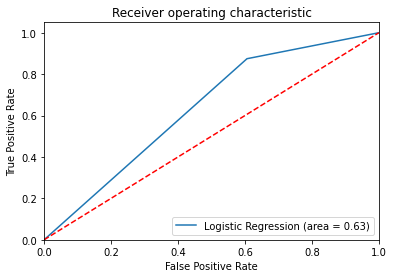

In [37]:
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## **6.Final Evaluation on Accuracy KNN Vs Logistic Regression**

In [49]:
knn_log_compare = pd.DataFrame(columns=['knn_without_scaler', 'knn_with_scaler', 'log_without_scaler', 'log_with_scaler'])
knn_log_compare = knn_log_compare.append({'knn_without_scaler': knn_without_scaler, 'knn_with_scaler': knn_with_scaler, 'log_without_scaler': log_without_scaler, 'log_with_scaler': log_with_scaler }, ignore_index=True)

In [50]:
knn_log_compare

,knn_without_scaler,knn_with_scaler,log_without_scaler,log_with_scaler
0,0.71159,0.811321,0.700809,0.703504
